In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import re

In [2]:
def list_folder_contents(folder_path, name):
    try:
        contents = os.listdir(folder_path)
        print("Contents of " + name + " folder:")
        for item in contents:
            print(item)
    except FileNotFoundError:
        print(f"Error: Folder '{folder_path}' not found.")
    except PermissionError:
        print(f"Error: Permission denied for folder '{folder_path}'.")

# Example usage:
# folder_path = 'img/traditional'
# list_folder_contents(folder_path)


In [3]:
#function to get image format
def image(name):
    path = 'img/' + name + '.jpg'
    img = cv.imread(path)
    
    formats = ['png', 'jpeg', 'jpg']
    for i in formats:
        #to ensure we get the write format in file
        path = 'img/' + name + '.' + i
        img = cv.imread(path,0)
        #use this to display img in grayscale mode
        # img = cv2.imread(path,0)
        if img is None:
            continue
        else:
            break

    return img

In [4]:
def plotOriginal(image):
    #plot the original img
    plt.subplot(1,2,1)
    plt.title("original")
    plt.imshow(image)

In [5]:
def plotOthers(image,title):
    plt.subplot(1,2,2)
    plt.title(title)
    plt.imshow(image)

In [6]:
def translation(img):
    rows, cols = img.shape
    x = int(input("Enter the x-axis translation value"))
    y = int(input("Enter the y-axis translation value"))

    M = np.float32([[1,0,x],[0,1,y]])
    image2 = cv.warpAffine(img, M, (cols, rows))

    plotOthers(image2, "Translated Image")
    return "Process Successful"


In [7]:
def reflection(img):
    rows, cols = img.shape
    x = int(input("Enter:\n1 to reflect by row or\n2 for column\n"))
    if(x==1):
        reflect = rows
    else:
        reflect = cols
    M = np.float32([[1,0,0],[0,-1,reflect],[0,0,1]])
    image2 = cv.warpPerspective(img, M, (int(cols), int(rows)))

    plotOthers(image2, "Reflected Image")
    return "Process Successful"

In [8]:
def rotation(img):
    rows, cols = img.shape
    M = cv.getRotationMatrix2D((cols/2, rows/2), 30, 0.6)
    image2 = cv.warpAffine(img, M, (cols, rows))

    plotOthers(image2, "Rotated Image")
    return "Process Successful"

In [9]:
def cropping(img):
    rows, cols = img.shape
    x1 = int(input("Enter the x1 cropping value"))
    x2 = int(input("Enter the x2 cropping value"))
    y1 = int(input("Enter the y1 cropping value"))
    y2 = int(input("Enter the y2 cropping value"))
    image2 = img[x1:x2, y1:y2]

    plotOthers(image2, "Cropped Image")
    return "Process Successful"

In [10]:
def sheared_X(img):
    rows, cols = img.shape
    M = np.float32([[1, 0.5, 0], [0, 1, 0], [0,0,1]])
    image2 = cv.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))

    plotOthers(image2, "Sheared in X-Axis")
    return "Process Successful"

In [11]:
def sheared_Y(img):
    rows, cols = img.shape
    M = np.float32([[1, 0, 0], [0.5, 1, 0], [0,0,1]])
    image2 = cv.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))

    plotOthers(image2, "Sheared in Y-Axis")
    return "Process Successful"

In [12]:
def blurring(img):
    x = int(input("Enter:\n1 to perform Gaussian Blurring\n2 to perform Median Blurring\n3 to perform Bilateral Blurring\n"))
    if(x==1):
        image2 = cv.GaussianBlur(img, (7, 7), 0)
        plotOthers(image2, "Gaussian Blurring")
    elif(x==2):
        image2 = cv.medianBlur(img, 5)
        plotOthers(image2, "Median Blurring")
    elif(x==3):
        image2 = cv.bilateralFilter(img, 9, 75, 75)
        plotOthers(image2, "Bilateral Blurring")
    else:
        return 'invalid input'

    
    return "Process Successful"

In [13]:
def getImage():
    list_folder_contents('img', 'img')
    folder = input("Enter the folder name from the above listed folder")
    dir = "img/"+folder
    list_folder_contents(dir, folder)
    name = input("Enter the picture name (WITHOUT THE FILE EXTENSION- ie .jpeg)")
    path = folder + "/" + name
    print(path)
    # img = 
    img = image(path)
    if img is None:
        return "Error: Could not read the image."
    # else:
    #     return "Yes"

    return img


In [14]:
def is_valid_email(email):
    # Regular expression pattern for validating email addresses
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    
    # Check if the email matches the pattern
    if re.match(pattern, email):
        return True
    else:
        return False

In [15]:
def operation(img):
    operation = int(input('Enter a number to perform an operation: \n1 to translate image,\n2 to reflect images,\n3 to rotate images,\n4 to crop, \n5 to shear in X-axis, \n6 to shear in Y-axis, \n7 to blur image\n'))
    plotOriginal(img)
    if(operation == 1):
        translation(img)
    elif(operation == 2):
        reflection(img)
    elif(operation == 3):
        rotation(img)
    elif(operation == 4):
        cropping(img)
    elif(operation == 5):
        sheared_X(img)
    elif(operation == 6):
        sheared_Y(img)
    elif(operation == 7):
        blurring(img)
    else:
        return "invalid input"

Enter email address:  lotanna@pau.edu.ng
Enter age:  19


lotanna@pau.edu.ng logged in successfully
Contents of img folder:
.DS_Store
Traditional
Modern
Contemporary


Enter the folder name from the above listed folder contemporary


Contents of contemporary folder:
flexibility.jpg
.DS_Store
durbar.jpg
idanre.jpg


Enter the picture name (WITHOUT THE FILE EXTENSION- ie .jpeg) idanre


[ WARN:0@25.933] global loadsave.cpp:248 findDecoder imread_('img/contemporary/idanre.png'): can't open/read file: check file path/integrity
[ WARN:0@25.933] global loadsave.cpp:248 findDecoder imread_('img/contemporary/idanre.jpeg'): can't open/read file: check file path/integrity


contemporary/idanre


Enter a number to perform an operation: 
1 to translate image,
2 to reflect images,
3 to rotate images,
4 to crop, 
5 to shear in X-axis, 
6 to shear in Y-axis, 
7 to blur image
 4
Enter the x1 cropping value 234
Enter the x2 cropping value 400
Enter the y1 cropping value 300
Enter the y2 cropping value 600


'lotanna@pau.edu.ng logged in successfully'

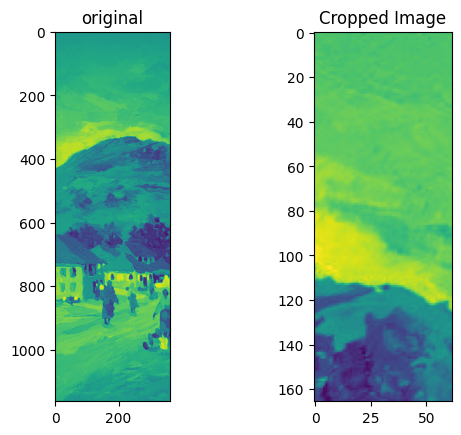

In [16]:
def login():
    email = input('Enter email address: ')

     # if invalid email
    if not is_valid_email(email):
        return "invalid email"

    
    age = int(input('Enter age: '))  
    
    #ending process if age is invalid
    if(age < 18):
        return "Invalid Age. Process terminated"

    #Age is valid

    print(email+" logged in successfully")

    #using the image function to end process if image cant be gotten
    img = getImage()
    if img is None:
        return "Error: Could not read the image."

    operation(img)

    #remove/delete created GUI window from screen and memory
    cv.destroyAllWindows()

    return email+ " logged in successfully"

login()
